# Visual Data Analysis of Fraudulent Transactions

Your CFO has also requested detailed trends data on specific card holders. Use the starter notebook to query your database and generate visualizations that supply the requested information as follows, then add your visualizations and observations to your markdown report.

In [187]:
# Initial imports
import pandas as pd
import calendar
import plotly.express as px
import hvplot.pandas
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import os
import datetime as dt

In [2]:
load_dotenv()
pgpass = os.getenv('pgpass')
conn = psycopg2.connect(database = 'suspicious_transactions', user = 'postgres', password = pgpass, port = 5432)


## Data Analysis Question 1

The two most important customers of the firm may have been hacked. Verify if there are any fraudulent transactions in their history. For privacy reasons, you only know that their cardholder IDs are 2 and 18.

* Using hvPlot, create a line plot representing the time series of transactions over the course of the year for each cardholder separately. 

* Next, to better compare their patterns, create a single line plot that containins both card holders' trend data.  

* What difference do you observe between the consumption patterns? Does the difference suggest a fraudulent transaction? Explain your rationale in the markdown report.

In [177]:
# loading data for card holder 2 and 18 from the database
# Write the query
query_2_18 = '''
select date, cardholder_id, 
amount from anon_data
where cardholder_id = 2 OR cardholder_id = 18
order by date
'''
# Create a DataFrame from the query result. HINT: Use pd.read_sql(query, engine)
cardholders_2_18_df = pd.read_sql(query_2_18, conn).set_index('date')
cardholders_2_18_df.groupby('cardholder_id').describe()

amount                                                    \
               count       mean         std   min   25%    50%     75%   
cardholder_id                                                            
2               99.0   9.591919    5.541201  0.70  4.14  10.26  13.295   
18             133.0  90.982030  324.714216  0.67  3.46  10.37  16.160   

                        
                   max  
cardholder_id           
2                19.51  
18             1839.00

In [178]:
# Plot for cardholder 2
cardholder_2_plot = cardholders_2_18_df[cardholders_2_18_df['cardholder_id'] == 2].hvplot.line(x = 'date', y = 'amount')
cardholder_2_plot

:Curve   [date]   (amount)

In [175]:
# Plot for cardholder 18
cardholder_18_plot = cardholders_2_18_df[cardholders_2_18_df['cardholder_id'] == 18].hvplot.line(x = 'date', y = 'amount')
cardholder_18_plot

:Curve   [date]   (amount)

In [176]:
# Combined plot for card holders 2 and 18
cardholder_2_plot * cardholder_18_plot + cardholders_2_18_df.hvplot.line(groupby = 'cardholder_id', ylim = [-5, 2000])

:Layout
   .Overlay.I    :Overlay
      .Curve.I  :Curve   [date]   (amount)
      .Curve.II :Curve   [date]   (amount)
   .DynamicMap.I :DynamicMap   [cardholder_id]
      :Curve   [date]   (amount)

## Data Analysis Question 2

The CEO of the biggest customer of the firm suspects that someone has used her corporate credit card without authorization in the first quarter of 2018 to pay quite expensive restaurant bills. Again, for privacy reasons, you know only that the cardholder ID in question is 25.

* Using Plotly Express, create a box plot, representing the expenditure data from January 2018 to June 2018 for cardholder ID 25.

* Are there any outliers for cardholder ID 25? How many outliers are there per month?

* Do you notice any anomalies? Describe your observations and conclusions in your markdown report.

In [247]:
# loading data of daily transactions from jan to jun 2018 for card holder 25
# Write the query
query_25 = '''
select date, amount
from anon_data
where cardholder_id = 25
and date between '2018-01-01' and '2018-06-30'
order by date;
'''
# Create a DataFrame from the query result. HINT: Use pd.read_sql(query, engine)
cardholder_25 = pd.read_sql(query_25, conn)
cardholder_25.head()

,date,amount
0,2018-01-02 02:06:21,1.46
1,2018-01-05 06:26:45,10.74
2,2018-01-07 14:57:23,2.93
3,2018-01-10 00:25:40,1.39
4,2018-01-14 05:02:22,17.84


In [246]:
# loop to change the numeric month to month names
cardholder_25['month'] = cardholder_25['date'].dt.month_name()
cardholder_25.groupby(pd.Grouper(key = 'month')).describe()

amount                                                               
          count        mean         std   min      25%     50%     75%     max
month                                                                         
January    10.0  123.384000  370.256053  1.39   1.7925   2.840  14.580  1177.0
February   10.0    6.491000    5.489180  0.91   1.6025   4.830  10.795    16.7
March      13.0  110.953846  367.543328  1.65   2.8800  10.100  16.580  1334.0
April      16.0   97.981250  265.895041  2.62   7.3125  10.195  17.870  1063.0
May         5.0  213.498000  465.402688  1.10   2.2700   5.970  12.150  1046.0
June       13.0  294.954615  582.285354  1.03  10.6900  11.880  16.610  1813.0

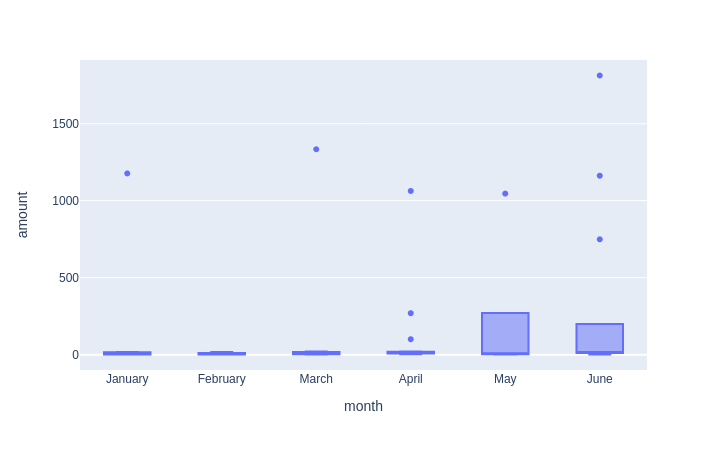

In [240]:
# Creating the six box plots using plotly express
px.box(cardholder_25, x = 'month', y = 'amount')